<a href="https://colab.research.google.com/github/Cheruugit/ML_Playground/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Telcom is a telecommunications company in Kenya providing services to a diverse customer base. With increasing competition in the telecom industry, retaining customers has become crucial for Telcom's success. Customer churn, or the loss of subscribers, poses a considerable risk, affecting Telcom's revenue and market position.

To reduce churn, Telcom aims to leverage advanced analytics and machine learning techniques to develop a predictive model. By analyzing historical customer data, including demographics, usage patterns, and customer interactions, Telcom intends to identify behavioral patterns indicative of churn. The predictive model will enable Telcom to identify at-risk customers and offer targeted retention strategies, thereby reducing churn rates and enhancing customer satisfaction.

The successful implementation of the predictive model will empower Telcom to optimize its customer retention efforts, strengthen customer loyalty, and maintain a competitive edge in the telecommunications market.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test=pd.read_csv('/content/churn-bigml-20.csv')
train=pd.read_csv('/content/churn-bigml-80.csv')

In [5]:
print(train.shape)
print(test.shape)

(2666, 20)
(667, 20)


Data Preprocessing

In [6]:
train.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
train.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

Check for missing values

In [9]:
train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

# **EDA**

In [10]:
df= train.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

### **Univariate Analysis**

Churn Distribution

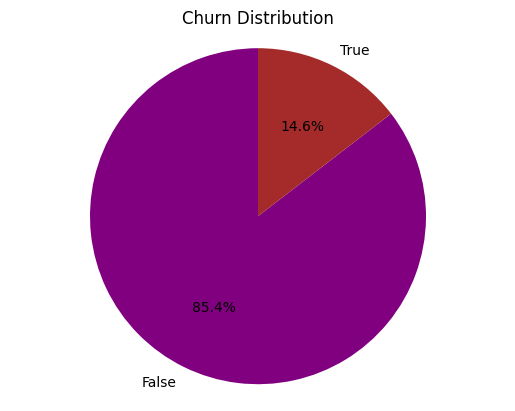

In [11]:
churn_counts = df['Churn'].value_counts()

plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=[ 'purple', 'brown'], startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

Distribution of Customers Across States?

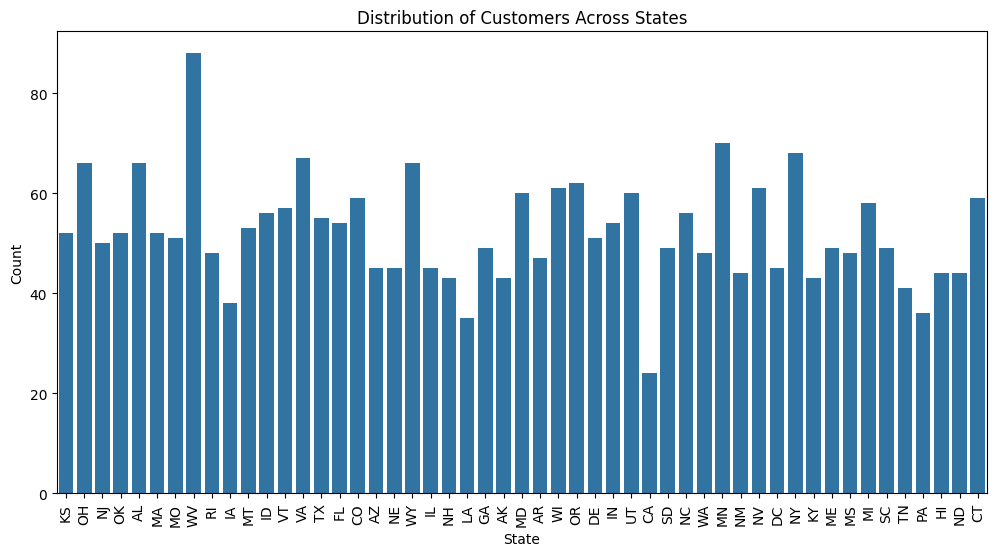

In [12]:

plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df)
plt.title('Distribution of Customers Across States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()




Customers Distribution Across Area Codes

---



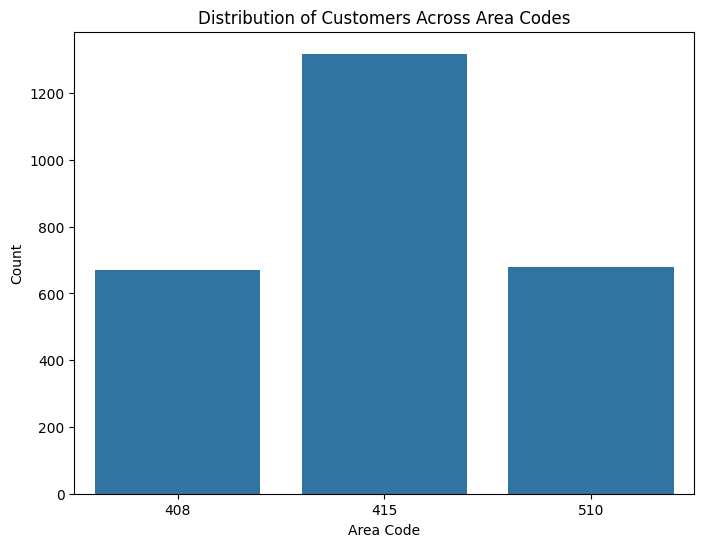

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Area code', data=df)
plt.title('Distribution of Customers Across Area Codes')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()



Distribution of Customers with International Plans

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:378: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


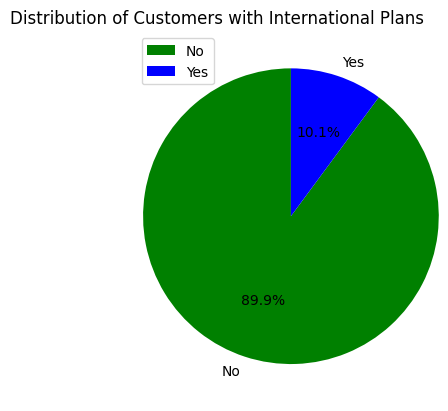

In [14]:
Internplans= df['International plan'].value_counts()
plt.pie(Internplans.values, labels= Internplans.index,autopct='%1.1f%%', colors=[ 'green','blue'], startangle=90)
sns.countplot(x='International plan', data=df)
plt.title('Distribution of Customers with International Plans')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()



Distribution of Customers with Voice Mail Plans?

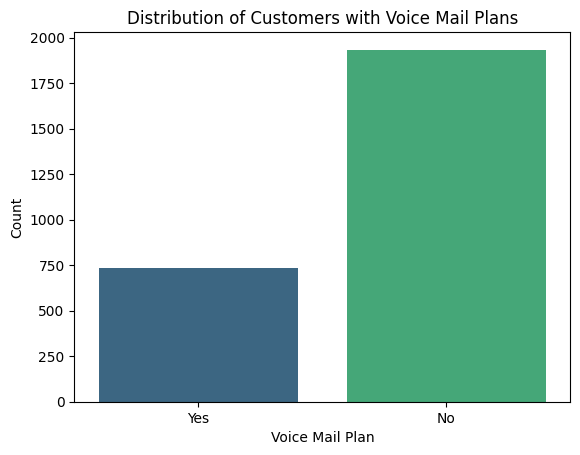

In [15]:
sns.countplot(x='Voice mail plan',hue='Voice mail plan', data=df, palette= 'viridis')
plt.title('Distribution of Customers with Voice Mail Plans')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()



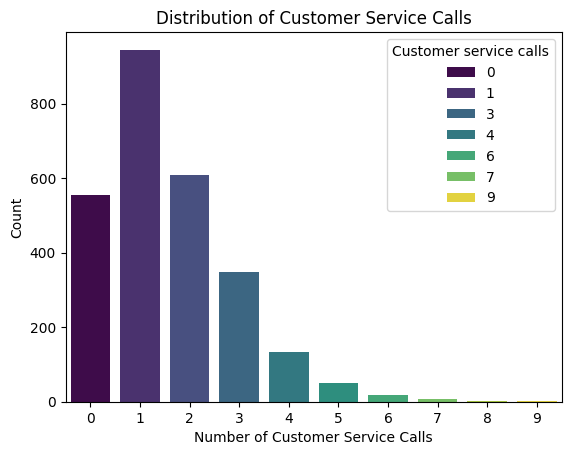

In [16]:
sns.countplot(x='Customer service calls',hue='Customer service calls', data=df,palette='viridis')
plt.title('Distribution of Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt.show()



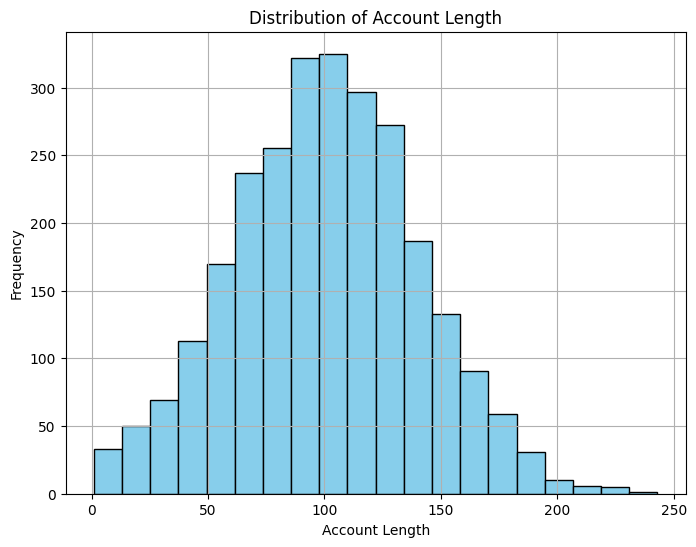

In [17]:
# Histogram for Account length
plt.figure(figsize=(8, 6))
plt.hist(df['Account length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Account Length')
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

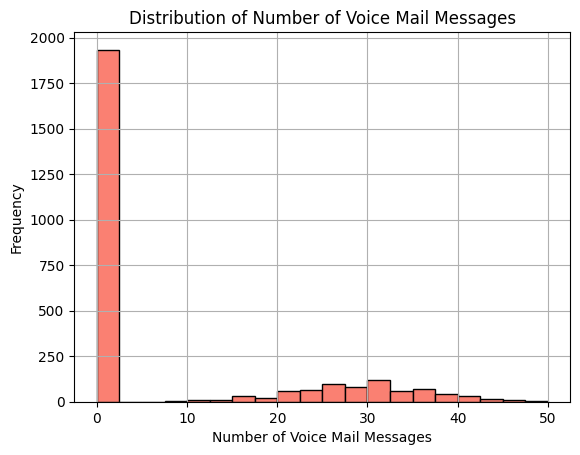

In [18]:
plt.hist(df['Number vmail messages'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Number of Voice Mail Messages')
plt.xlabel('Number of Voice Mail Messages')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

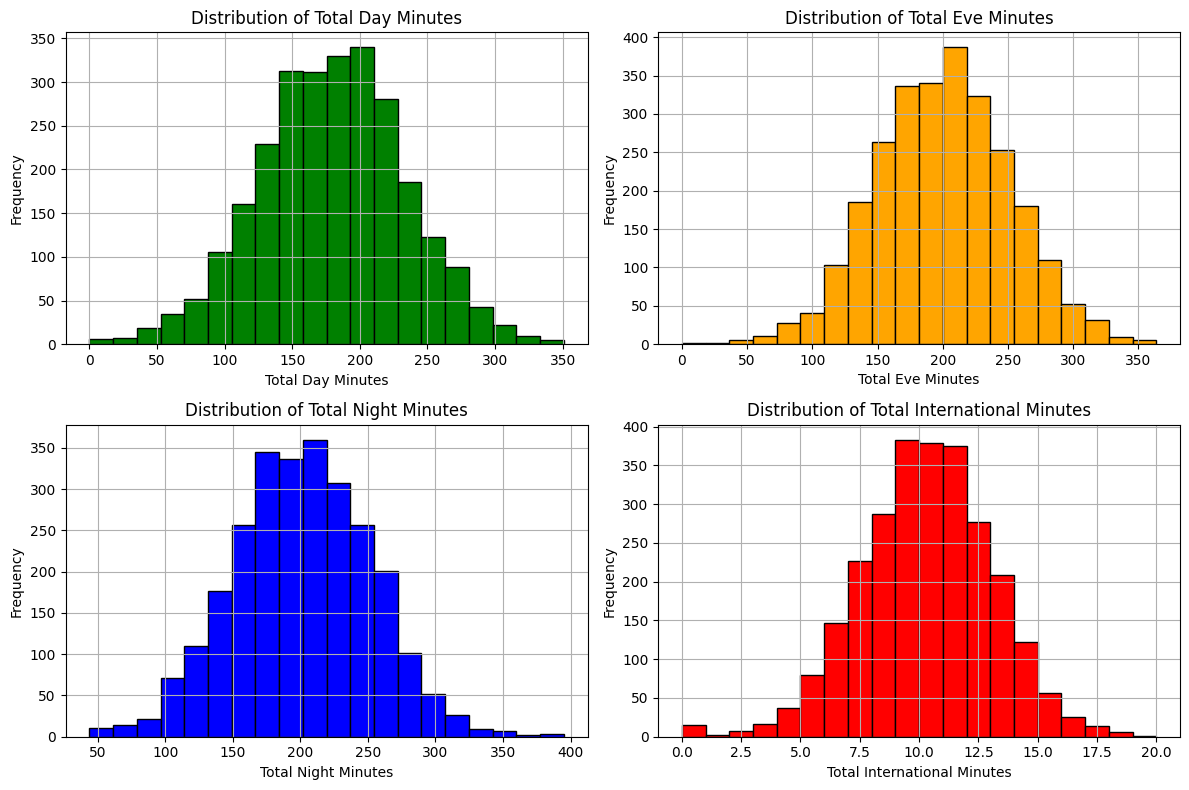

In [19]:



# Histograms for Total day minutes, Total eve minutes, Total night minutes, Total intl minutes
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['Total day minutes'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(df['Total eve minutes'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Total Eve Minutes')
plt.xlabel('Total Eve Minutes')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(df['Total night minutes'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Total Night Minutes')
plt.xlabel('Total Night Minutes')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(df['Total intl minutes'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Total International Minutes')
plt.xlabel('Total International Minutes')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()






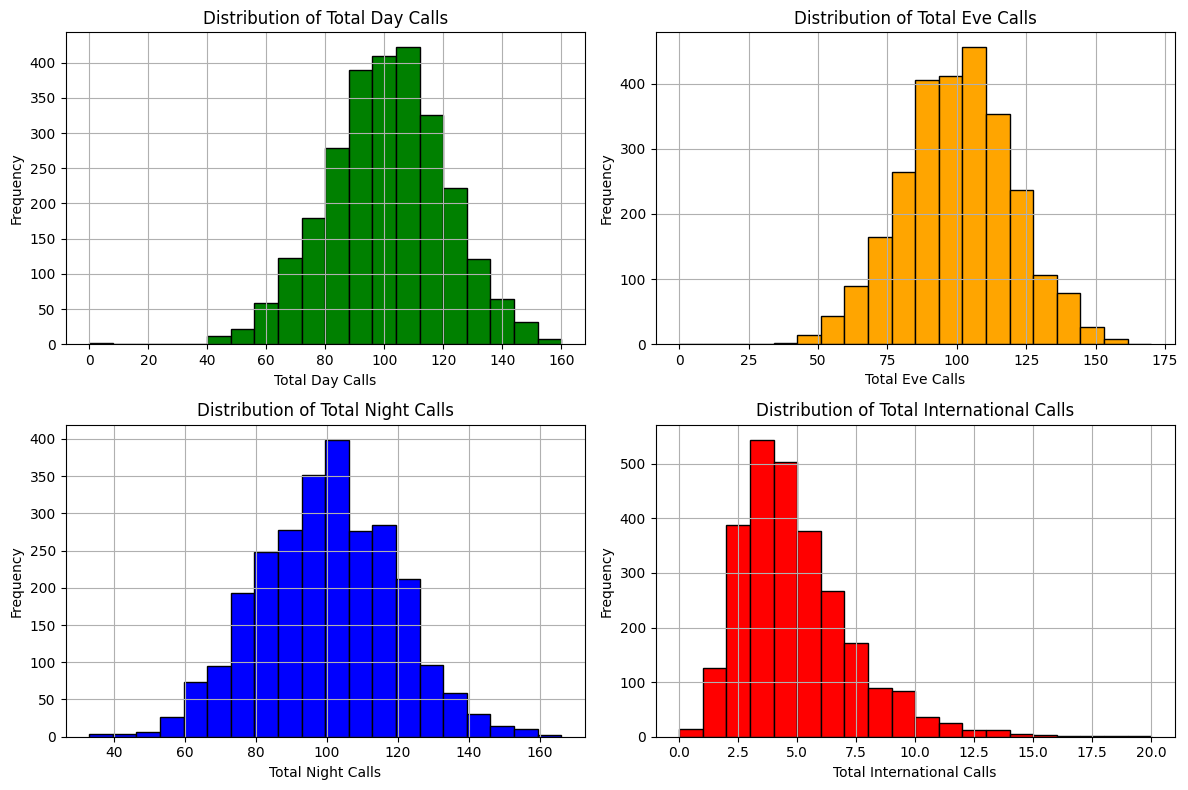

In [20]:
# Histograms for Total day calls, Total eve calls, Total night calls, Total intl calls
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['Total day calls'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Total Day Calls')
plt.xlabel('Total Day Calls')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(df['Total eve calls'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Total Eve Calls')
plt.xlabel('Total Eve Calls')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(df['Total night calls'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Total Night Calls')
plt.xlabel('Total Night Calls')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(df['Total intl calls'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Total International Calls')
plt.xlabel('Total International Calls')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

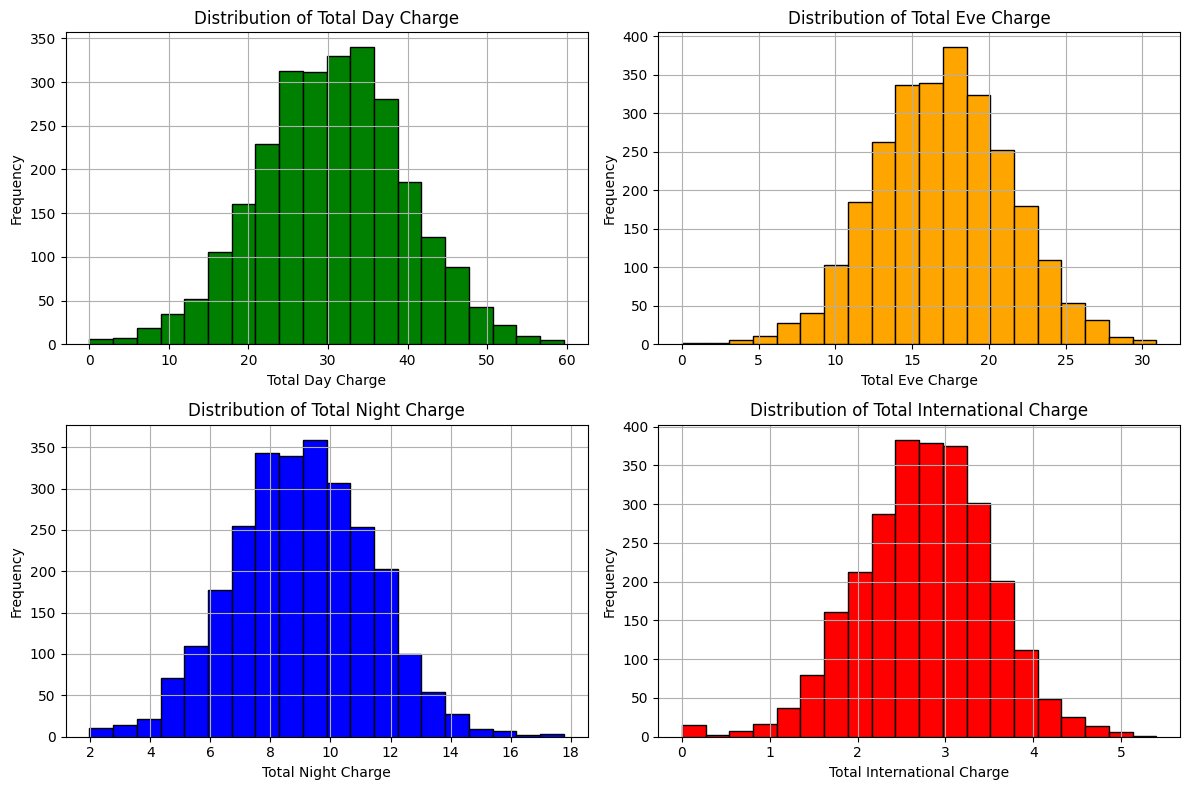

In [21]:
# Histograms for Total day charge, Total eve charge, Total night charge, Total intl charge
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['Total day charge'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Total Day Charge')
plt.xlabel('Total Day Charge')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(df['Total eve charge'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Total Eve Charge')
plt.xlabel('Total Eve Charge')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(df['Total night charge'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Total Night Charge')
plt.xlabel('Total Night Charge')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(df['Total intl charge'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Total International Charge')
plt.xlabel('Total International Charge')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

Visualize the relationship of ratio features in heatmap

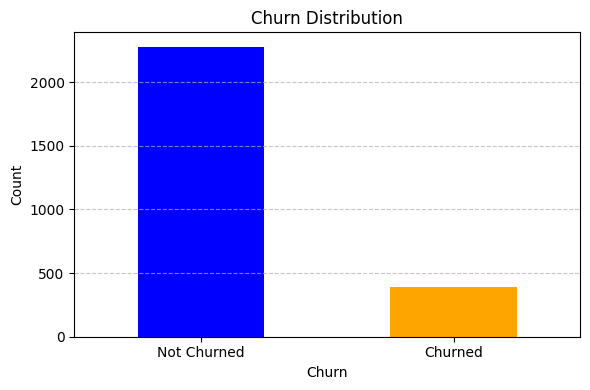

In [22]:
churn_counts = df['Churn'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **Bivariate Analysis**

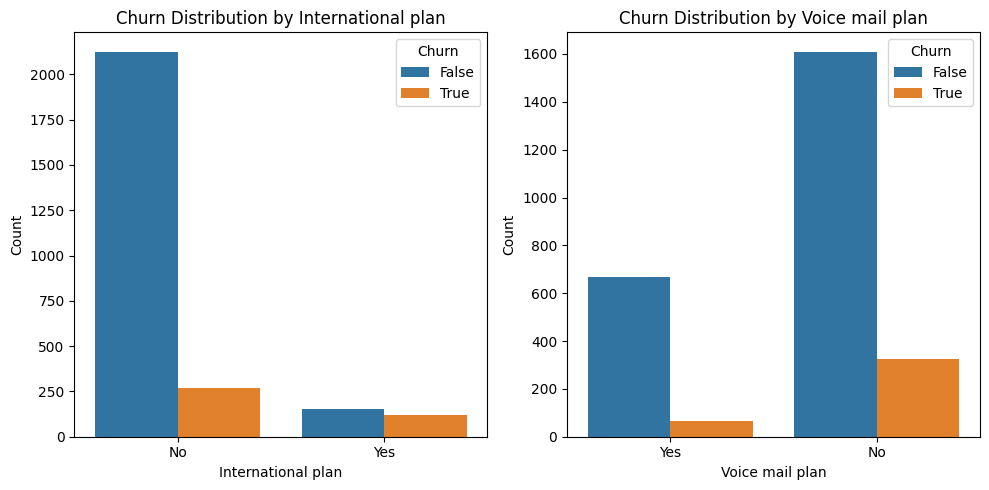

In [23]:
# Creating count plots for 'International plan' and 'Voice mail plan'
plt.figure(figsize=(10, 5))

# Plotting churn distribution for 'International plan'
plt.subplot(1, 2, 1)
sns.countplot(x='International plan', hue='Churn', data=df)
plt.title('Churn Distribution by International plan')
plt.xlabel('International plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Plotting churn distribution for 'Voice mail plan'
plt.subplot(1, 2, 2)
sns.countplot(x='Voice mail plan', hue='Churn', data=df)
plt.title('Churn Distribution by Voice mail plan')
plt.xlabel('Voice mail plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Adjusting layout and showing plot
plt.tight_layout()
plt.show()


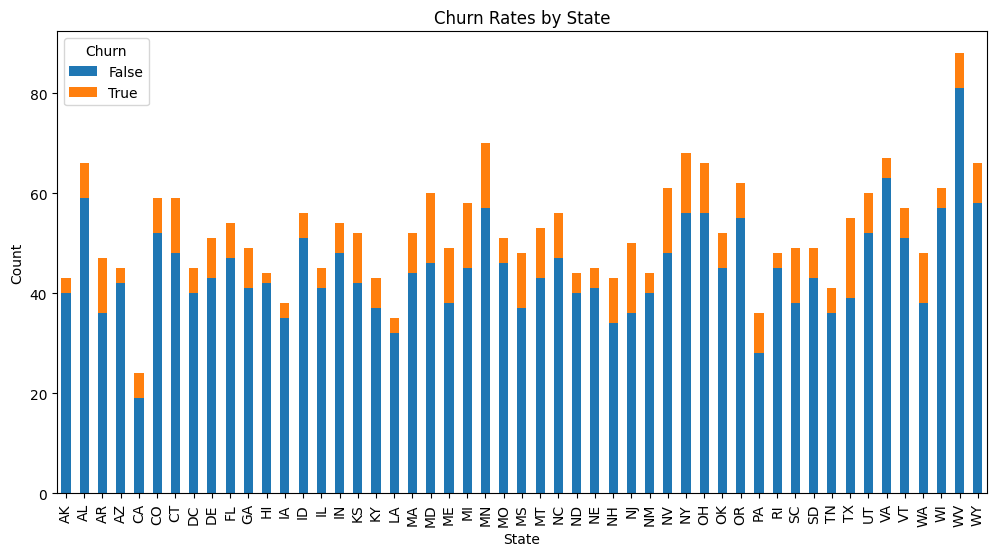

In [24]:
# Churn vs. State: Stacked bar plot
state_churn = df.groupby(['State', 'Churn']).size().unstack()
state_churn.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Churn Rates by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()



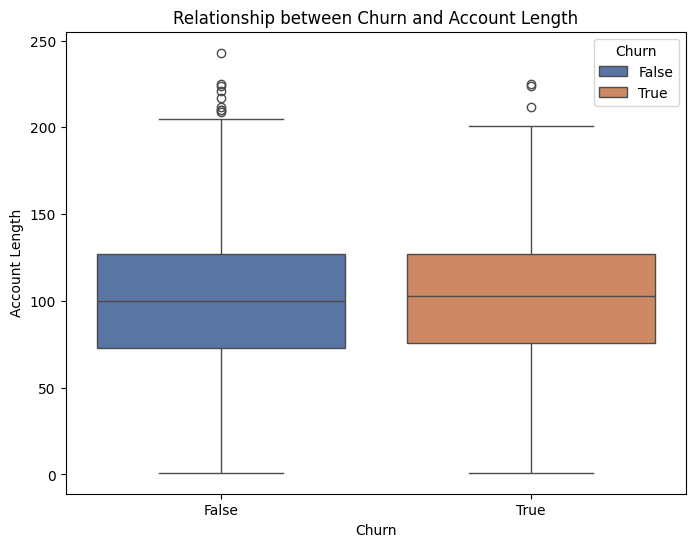

In [25]:

# Churn vs. Account Length: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn',hue='Churn', y='Account length', data=df, palette='deep')
plt.title('Relationship between Churn and Account Length')
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.show()



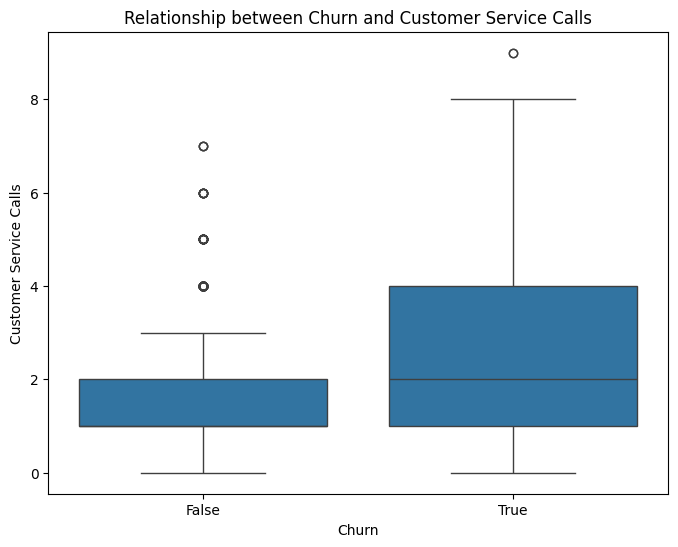

In [26]:
# Churn vs. Number of Customer Service Calls: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Customer service calls', data=df)
plt.title('Relationship between Churn and Customer Service Calls')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

We notice that churned customers tend to have a higher rate of customer service calls

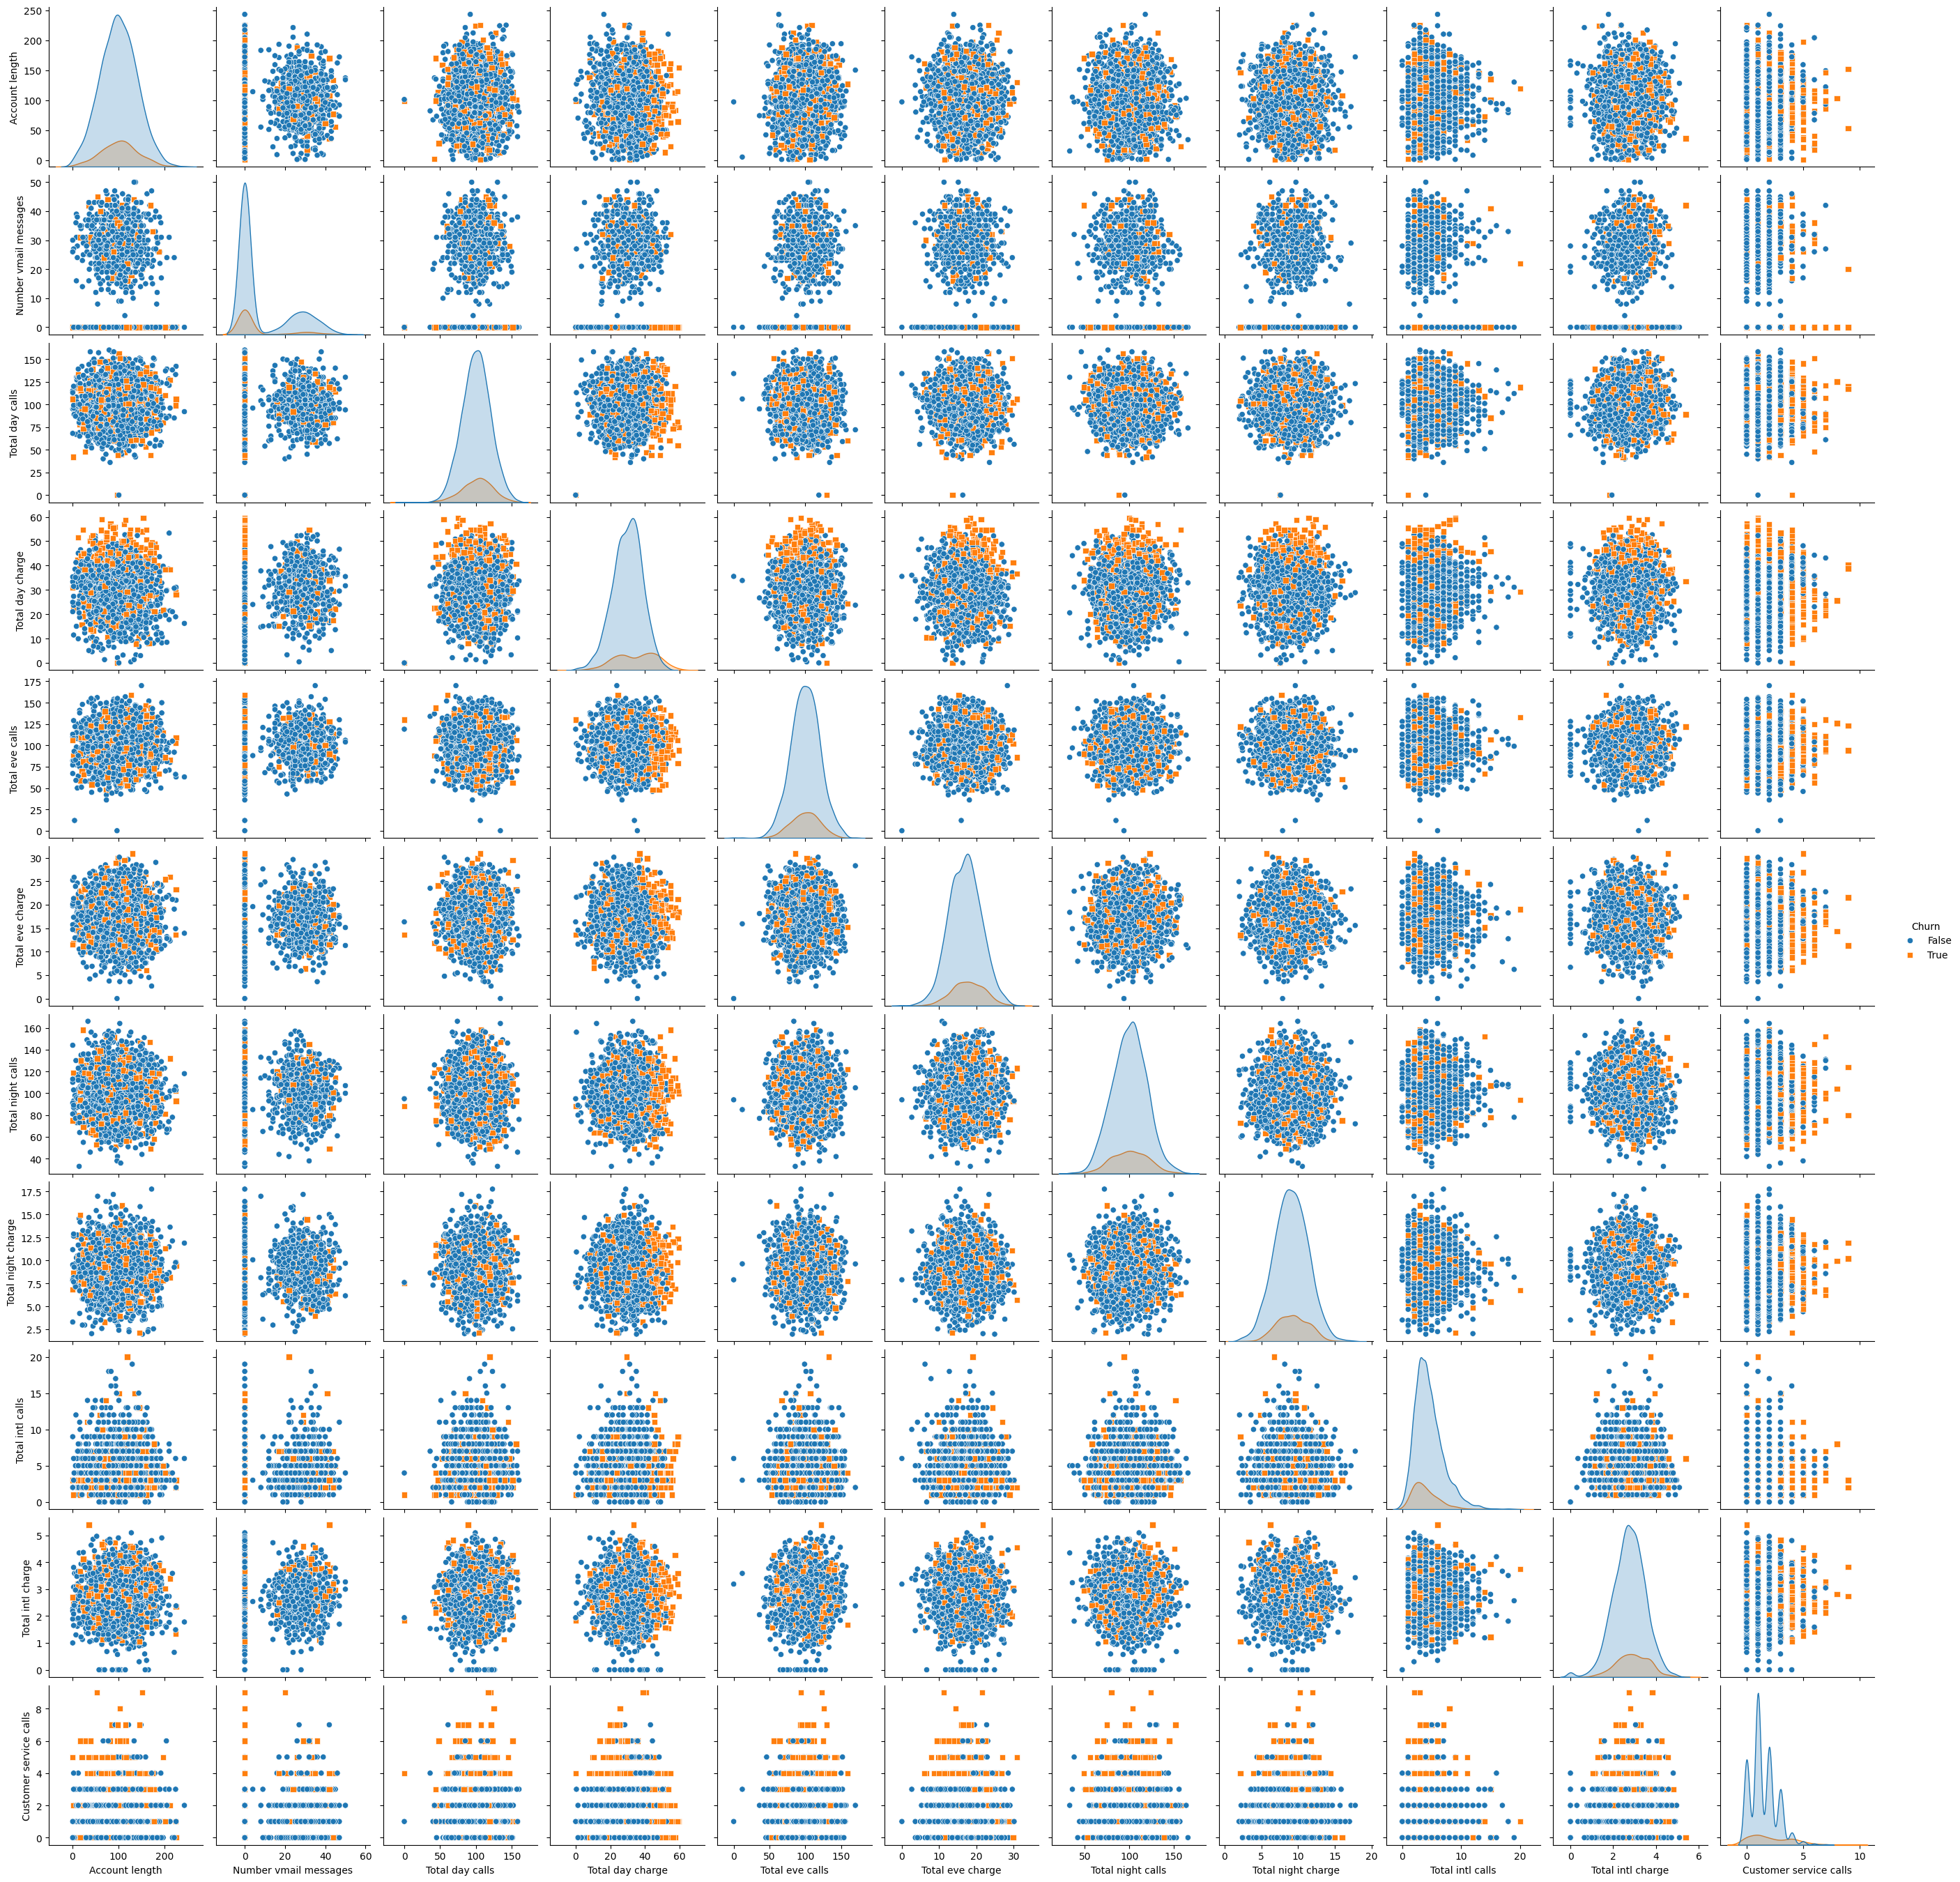

In [27]:
# Selecting numerical columns
numerical_columns =['Account length',
               'Number vmail messages', 'Total day calls',
              'Total day charge', 'Total eve calls', 'Total eve charge',
              'Total night calls', 'Total night charge', 'Total intl calls',
              'Total intl charge', 'Customer service calls']

# Creating pairplot with hue='Churn'
sns.pairplot(df, hue='Churn', markers=['o', 's'], diag_kind='kde', vars=numerical_columns)
plt.show()


When observing we can see that the diagonal elements of the pairplot display normally distributed histograms, this indicates that the individual numerical features themselves have a roughly normal distribution.

The scatterplots consistently show that churned customers have a higher frequency of customer service calls across all variables. This aligns with our initial finding from the box plot, which shows the importance of customer service interactions as an indicator of churn risk.

<Axes: >

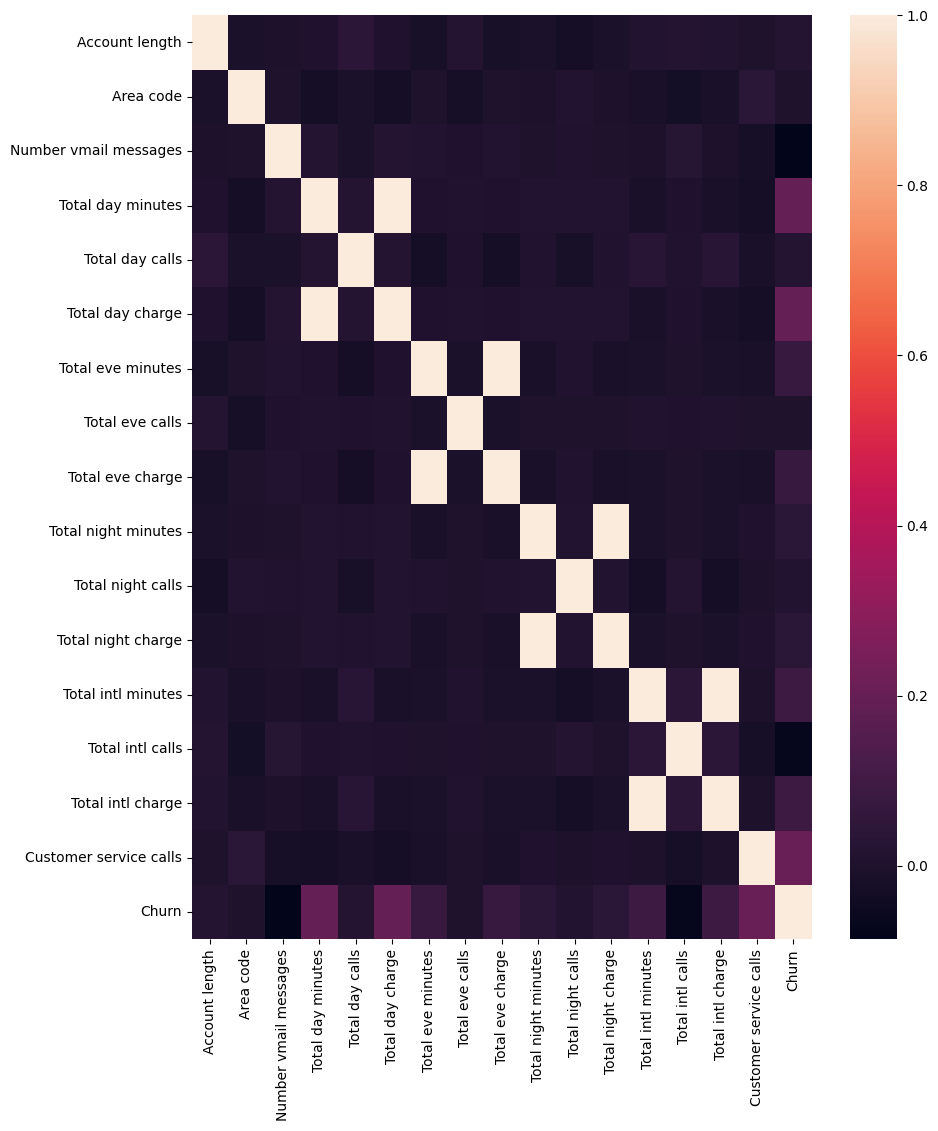

In [28]:
corr= train.corr(numeric_only= True)
plt.figure(figsize=(10, 12))
sns.heatmap(corr)

The heatmap reveals significant correlations among certain variables, notably between 'Total day minutes' and 'Total day charge', 'Total intl minutes' and 'Total intl charge', 'Total eve minutes' and 'Total eve charge', as well as 'Total night minutes' and 'Total night charge'. Given the similarity in column names, these strong correlations suggest the presence of multicollinearity.



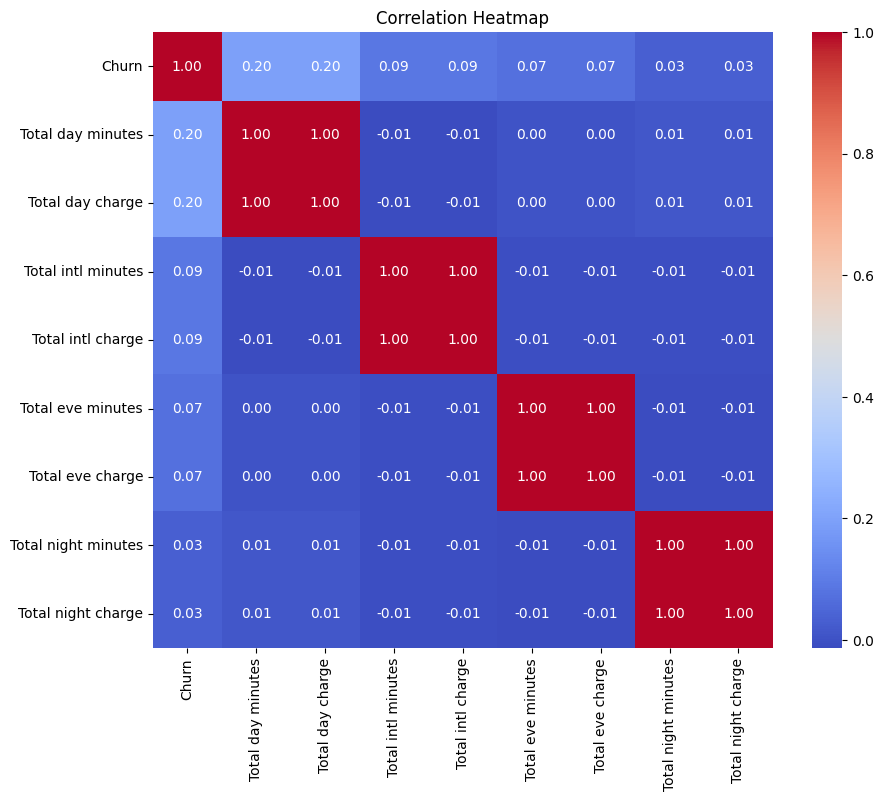

In [29]:
# Define the correlations of interest
columns_of_interest = ['Churn', 'Total day minutes', 'Total day charge',
                       'Total intl minutes', 'Total intl charge',
                       'Total eve minutes', 'Total eve charge',
                       'Total night minutes', 'Total night charge']

corr_interest = corr.loc[columns_of_interest, columns_of_interest]
plt.figure(figsize=(10, 8))
sns.heatmap(corr_interest, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Since the minutes-based variables and their charge counterparts show similar strong correlations with Churn, we'll simplify our dataset by keeping only the charge columns and dropping the minutes columns.

In [30]:
minute_columns = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
df.drop(minute_columns, axis=1, inplace=True)


# **Data Transformation**

In [31]:
categorical_features = ['State', 'International plan', 'Voice mail plan']

# Explore unique values and frequencies of categorical features
for feature in categorical_features:

    print(f"Unique values for {feature}:")
    print(train[feature].unique())
    print("\n")


Unique values for State:
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']


Unique values for International plan:
['No' 'Yes']


Unique values for Voice mail plan:
['Yes' 'No']




In [32]:
df['Churn'] = df['Churn'].astype(int)
df['Churn'].unique()

array([0, 1])

In [33]:
binary_categorical_columns = ['International plan', 'Voice mail plan']

# Iterate over each binary categorical column and encode 'yes' as 1 and 'no' as 0
for col in binary_categorical_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

print(df['International plan'].unique())
print(df['Voice mail plan'].unique())

[0 1]
[1 0]


In [34]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Area code'
df['Area code'] = label_encoder.fit_transform(df['Area code'])

# Apply label encoding to 'State'
df['State'] = label_encoder.fit_transform(df['State'])

df.head()


State  Account length  Area code  International plan  Voice mail plan  \
0     16             128          1                   0                1   
1     35             107          1                   0                1   
2     31             137          1                   0                0   
3     35              84          0                   1                0   
4     36              75          1                   1                0   

   Number vmail messages  Total day calls  Total day charge  Total eve calls  \
0                     25              110             45.07               99   
1                     26              123             27.47              103   
2                      0              114             41.38              110   
3                      0               71             50.90               88   
4                      0              113             28.34              122   

   Total eve charge  Total night calls  Total night charge  Total intl calls  \
0             16.78                 91               11.01                 3   
1             16.62                103               11.45                 3   
2             10.30                104                7.32                 5   
3              5.26                 89                8.86                 7   
4             12.61                121                8.41                 3   

   Total intl charge  Customer service calls  Churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

In [35]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day calls',
       'Total day charge', 'Total eve calls', 'Total eve charge',
       'Total night calls', 'Total night charge', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns
numerical_columns = df[['Account length',
       'Number vmail messages', 'Total day calls',
       'Total day charge', 'Total eve calls', 'Total eve charge',
       'Total night calls', 'Total night charge', 'Total intl calls',
       'Total intl charge', 'Customer service calls']]


# Initialize the StandardScaler
scaler = StandardScaler()

for col in numerical_columns:
    df[col] = scaler.fit_transform(df[[col]])

df.head()


State  Account length  Area code  International plan  Voice mail plan  \
0     16        0.692163          1                   0                1   
1     35        0.161278          1                   0                1   
2     31        0.919686          1                   0                0   
3     35       -0.420168          0                   1                0   
4     36       -0.647691          1                   1                0   

   Number vmail messages  Total day calls  Total day charge  Total eve calls  \
0               1.247508         0.484868          1.579942        -0.050781   
1               1.320985         1.135375         -0.330194         0.147654   
2              -0.589414         0.685024          1.179465         0.494917   
3              -0.589414        -1.466653          2.212675        -0.596479   
4              -0.589414         0.634985         -0.235772         1.090224   

   Total eve charge  Total night calls  Total night charge  Total intl calls  \
0         -0.058445          -0.469031            0.856707         -0.597527   
1         -0.095397           0.149054            1.049293         -0.597527   
2         -1.554963           0.200561           -0.758391          0.216894   
3         -2.718922          -0.572045           -0.084339          1.031314   
4         -1.021482           1.076181           -0.281303         -0.597527   

   Total intl charge  Customer service calls  Churn  
0          -0.085681               -0.429172      0  
1           1.242921               -0.429172      0  
2           0.698194               -1.191955      0  
3          -1.307995                0.333610      0  
4          -0.045823                1.096392      0

### **Model building**

**Define features X and target y**

In [37]:
X = df.drop('Churn', axis=1)
y = df['Churn']


**Perform cross validation to see which models perform better**

In [38]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, accuracy_score

num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and evaluate each model
for name, model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1')

    print(f"{name}:")
    print(f"  Mean Accuracy: {np.mean(accuracy_scores):.4f}, Std: {np.std(accuracy_scores):.4f}")
    print(f"  Mean F1 Score: {np.mean(f1_scores):.4f}, Std: {np.std(f1_scores):.4f}")


Decision Tree:
  Mean Accuracy: 0.9040, Std: 0.0132
  Mean F1 Score: 0.6741, Std: 0.0412
Random Forest:
  Mean Accuracy: 0.9377, Std: 0.0028
  Mean F1 Score: 0.7496, Std: 0.0282
Gradient Boosting:
  Mean Accuracy: 0.9494, Std: 0.0078
  Mean F1 Score: 0.8101, Std: 0.0256


 Gradient Boosting model has a good accuracy, with an improved F1 score.  indicating its effectiveness in capturing true positives(cases where model predicts customer churned and did churn indeed).

# **Transform test data**

In [40]:
test.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [41]:
minute_columns = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
test.drop(minute_columns, axis=1, inplace=True)

In [42]:
test['Churn'] = test['Churn'].astype(int)
test['Churn'].unique()

array([0, 1])

In [43]:
binary_categorical_columns = ['International plan', 'Voice mail plan']

# Iterate over each binary categorical column and encode 'yes' as 1 and 'no' as 0
for col in binary_categorical_columns:
    test[col] = test[col].map({'Yes': 1, 'No': 0})

print(test['International plan'].unique())
print(test['Voice mail plan'].unique())

[0 1]
[0 1]


In [44]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Area code'
test['Area code'] = label_encoder.fit_transform(test['Area code'])

# Apply label encoding to 'State'
test['State'] = label_encoder.fit_transform(test['State'])

test.head()


State  Account length  Area code  International plan  Voice mail plan  \
0     18             117          0                   0                0   
1     15              65          1                   0                0   
2     34             161          1                   0                0   
3     40             111          1                   0                0   
4     11              49          2                   0                0   

   Number vmail messages  Total day calls  Total day charge  Total eve calls  \
0                      0               97             31.37               80   
1                      0              137             21.95               83   
2                      0               67             56.59               97   
3                      0              103             18.77              102   
4                      0              117             20.28              109   

   Total eve charge  Total night calls  Total night charge  Total intl calls  \
0             29.89                 90                9.71                 4   
1             19.42                111                9.40                 6   
2             27.01                128                7.23                 9   
3             11.67                105                8.53                 6   
4             18.28                 90                8.04                 1   

   Total intl charge  Customer service calls  Churn  
0               2.35                       1      0  
1               3.43                       4      1  
2               1.46                       4      1  
3               2.08                       2      0  
4               3.00                       1      0

In [45]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns
numerical_columns = test[['Account length',
       'Number vmail messages', 'Total day calls',
       'Total day charge', 'Total eve calls', 'Total eve charge',
       'Total night calls', 'Total night charge', 'Total intl calls',
       'Total intl charge', 'Customer service calls']]


# Initialize the StandardScaler
scaler = StandardScaler()

for col in numerical_columns:
    test[col] = scaler.fit_transform(test[[col]])

test.head()


State  Account length  Area code  International plan  Voice mail plan  \
0     18        0.347127          0                   0                0   
1     15       -0.927731          1                   0                0   
2     34        1.425853          1                   0                0   
3     40        0.200028          1                   0                0   
4     11       -1.319994          2                   0                0   

   Number vmail messages  Total day calls  Total day charge  Total eve calls  \
0              -0.601245        -0.193167          0.064504        -1.081478   
1              -0.601245         1.769398         -0.934501        -0.923033   
2              -0.601245        -1.665090          2.739121        -0.183625   
3              -0.601245         0.101218         -1.271744         0.080450   
4              -0.601245         0.788115         -1.111607         0.450154   

   Total eve charge  Total night calls  Total night charge  Total intl calls  \
0          2.984789          -0.501749            0.323581         -0.212747   
1          0.505504           0.540053            0.185049          0.593516   
2          2.302808           1.383417           -0.784675          1.802910   
3         -1.329688           0.242395           -0.203735          0.593516   
4          0.235553          -0.501749           -0.422705         -1.422141   

   Total intl charge  Customer service calls  Churn  
0          -0.547714               -0.423098      0  
1           0.877843                1.828550      1  
2          -1.722480                1.828550      1  
3          -0.904104                0.327451      0  
4           0.310260               -0.423098      0

In [46]:
X_test=test.drop('Churn', axis=1)
y_test=test['Churn']

In [47]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform cross-validation
accuracy_scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='accuracy')
f1_scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='f1')

print("Cross-Validation Results for XGBoost:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}, Std: {np.std(accuracy_scores):.4f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.4f}, Std: {np.std(f1_scores):.4f}")


Cross-Validation Results for XGBoost:
Mean Accuracy: 0.9554, Std: 0.0075
Mean F1 Score: 0.8334, Std: 0.0257


In [48]:
 from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Assuming you have your test data stored in X_test and corresponding labels in y_test

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)
dt_predictions = dt_classifier.predict(X_test)
dt_report = classification_report(y_test, dt_predictions)

print("Decision Tree Classification Report:")
print(dt_report)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)
rf_predictions = rf_classifier.predict(X_test)
rf_report = classification_report(y_test, rf_predictions)

print("Random Forest Classification Report:")
print(rf_report)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X, y)
gb_predictions = gb_classifier.predict(X_test)
gb_report = classification_report(y_test, gb_predictions)

print("Gradient Boosting Classification Report:")
print(gb_report)

# XGBoost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X, y)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_report = classification_report(y_test, xgb_predictions)

print("XGBoost Classification Report:")
print(xgb_report)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       572
           1       0.65      0.68      0.67        95

    accuracy                           0.90       667
   macro avg       0.80      0.81      0.80       667
weighted avg       0.90      0.90      0.90       667

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       572
           1       0.95      0.61      0.74        95

    accuracy                           0.94       667
   macro avg       0.94      0.80      0.85       667
weighted avg       0.94      0.94      0.93       667

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.90      0.69      0.79        95

    accuracy                           0.95       667
   macro avg 

 The Gradient Boosting model stands out slightly due to its highest accuracy and balanced performance across both classes. The XGB though performing well, its precision and recall for class 1 are lower.

In [49]:
import pickle

In [50]:
data = {"model": gb_classifier}
with open('churn_model.pkl', 'wb') as file:
    pickle.dump(data, file)